In [1]:
# Step 1: Load and preprocess the data
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
import kagglehub
import matplotlib.pyplot as plt 
import seaborn as sns   

# Download latest version of the dataset
path = kagglehub.dataset_download("shivanandmn/multilabel-classification-dataset")

print("Path to dataset files:", path)

# Load the dataset
url_train = f'{path}/train.csv'
train_set  = pd.read_csv(url_train)

Path to dataset files: /home/lolli/.cache/kagglehub/datasets/shivanandmn/multilabel-classification-dataset/versions/1


In [2]:
train_set.head()

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [3]:

train_set.drop(columns=['ID'], inplace=True)
# Preprocess the data

# Combine the category columns into a list of categories for each paper
categories = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
train_set['Categories'] = train_set[categories].apply(lambda row: [cat for cat in categories if row[cat] == 1], axis=1)

train_set.head()

TITLE  \
0        Reconstructing Subject-Specific Effect Maps   
1                 Rotation Invariance Neural Network   
2  Spherical polyharmonics and Poisson kernels fo...   
3  A finite element approximation for the stochas...   
4  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance                      Categories  
0                     0              [Computer Science]  
1                     0              [Computer Science]  
2                     0                   [Mathematics]  
3                     0                   [Mathematics]  
4                     0  [Computer Science, Statistics]

/tmp/ipykernel_12474/3792989851.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


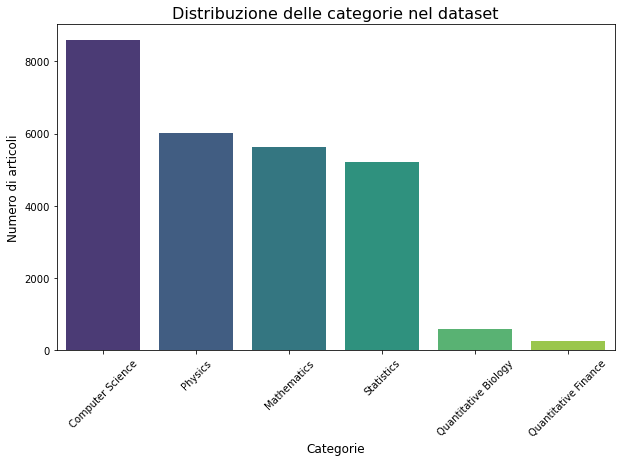

Number of occurrency for each category:
Computer Science: 8594
Physics: 6013
Mathematics: 5618
Statistics: 5206
Quantitative Biology: 587
Quantitative Finance: 249


In [4]:
# 1. Visualizzazione della distribuzione delle categorie
category_counts = train_set[categories].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribuzione delle categorie nel dataset", fontsize=16)
plt.ylabel("Numero di articoli", fontsize=12)
plt.xlabel("Categorie", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Stampa del numero di occorrenze per ogni categoria
print("Number of occurrency for each category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

In [5]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Flatten the list of categories
flattened_categories = train_set['Categories'].explode()

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(flattened_categories), y=flattened_categories)

# Create a dictionary mapping each category to its weight
class_weight_dict = {category: weight for category, weight in zip(np.unique(flattened_categories), class_weights)}

print("Class weights:", class_weight_dict)

# Apply class weights to the classifier
classifier_balanced = LogisticRegression(class_weight=class_weight_dict)

Class weights: {'Computer Science': 0.5094057869831665, 'Mathematics': 0.779251216328468, 'Physics': 0.7280614224735296, 'Quantitative Biology': 7.457978421351505, 'Quantitative Finance': 17.581659973226238, 'Statistics': 0.8409207324881547}


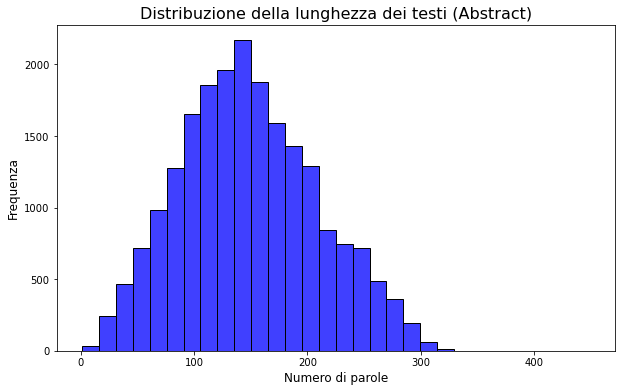

In [6]:
# 2. Esplorazione della lunghezza dei testi
# Aggiungiamo una colonna che rappresenta la lunghezza dell'abstract
train_set['Text_Length'] = train_set['ABSTRACT'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.histplot(train_set['Text_Length'], bins=30, color='blue')
plt.title("Distribuzione della lunghezza dei testi (Abstract)", fontsize=16)
plt.xlabel("Numero di parole", fontsize=12)
plt.ylabel("Frequenza", fontsize=12)
plt.show()

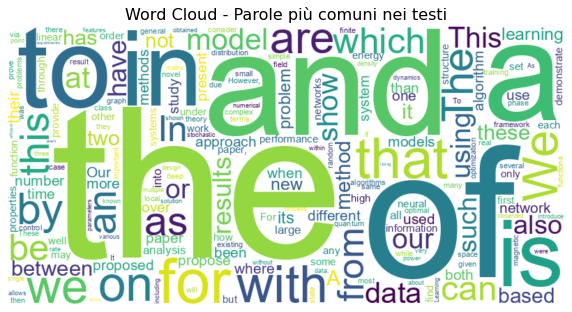

In [7]:
from wordcloud import WordCloud
from collections import Counter

train_set['TEXT'] = train_set['TITLE'] + ' ' + train_set['ABSTRACT']

# Uniamo tutti I TEXT
all_text = " ".join(str(text) for text in train_set['TEXT'])

# Troviamo le parole pi첫 comuni
word_freq = Counter(all_text.split())

# Creiamo una WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path="./ARIAL.TTF"  # Specifica il font
).generate_from_frequencies(word_freq)

# Mostra la WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Parole pi첫 comuni nei testi", fontsize=16)
plt.show()

In [8]:
contractions_dict = {
    "don't": "do not",
    "doesn't": "does not",
    "can't": "cannot",
    "isn't": "is not",
    "won't": "will not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not",
    "couldn't": "could not",
    "shouldn't": "should not",
    "wouldn't": "would not",
    "it's": "it is",
    "I'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "we're": "we are",
    "they're": "they are",
    "I've": "I have",
    "you've": "you have",
    "we've": "we have",
    "they've": "they have",
    "I'll": "I will",
    "you'll": "you will",
    "he'll": "he will",
    "she'll": "she will",
    "we'll": "we will",
    "they'll": "they will",
    "I'd": "I would",
    "you'd": "you would",
    "he'd": "he would",
    "she'd": "she would",
    "we'd": "we would",
    "they'd": "they would",
    "I won't": "I will not",
    "you won't": "you will not",
    "he won't": "he will not",
    "she won't": "she will not",
    "we won't": "we will not",
    "they won't": "they will not",
}


def expand_contractions(text, contractions_dict):
    for contraction, expansion in contractions_dict.items():
        text = text.replace(contraction, expansion)
    return text



In [9]:
import nltk
from nltk.corpus import stopwords
import re

# Preprocess the text data
train_set['TITLE'] = train_set['TITLE'].str.lower().str.replace(r'[^\\w\\s]', '').str.replace(r'\\d+', '').str.strip()
train_set['ABSTRACT'] = train_set['ABSTRACT'].str.lower().str.replace(r'[^\\w\\s]', '').str.replace(r'\\d+', '').str.strip()
train_set['PROCESSED_TEXT'] = train_set['TITLE'] + ' ' + train_set['ABSTRACT']

# Scarica il set di stop words in italiano o ingles
#nltk.download('stopwords')

# Stop words in inglese
stop_words = set(nltk.corpus.stopwords.words('english'))

# Funzione per rimuovere stop words
def remove_stop_words(text):
    # Tokenizza il testo, rimuove stop words e parole corte
    words = " ".join([contractions_dict.get(word, word) for word in text.split()])
    words = [word for word in text.split() if word not in stop_words and len(word) > 1]
    
    return " ".join(words)

# Applica la funzione alla colonna 'text' o 'ABSTRACT'
train_set['PROCESSED_TEXT'] = train_set['PROCESSED_TEXT'].apply(lambda x: expand_contractions(x, contractions_dict))
train_set['PROCESSED_TEXT'] = train_set['PROCESSED_TEXT'].apply(remove_stop_words)

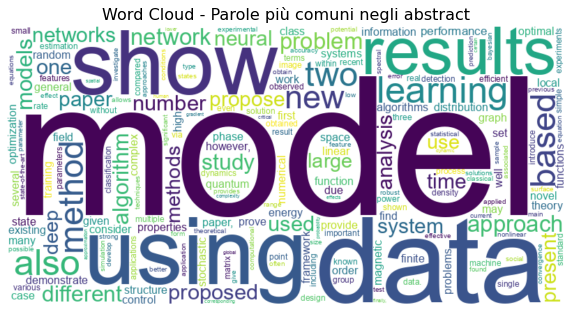

In [10]:
# Uniamo tutti gli abstract
all_text = " ".join(str(text) for text in train_set['PROCESSED_TEXT'])

# Troviamo le parole pi첫 comuni
word_freq = Counter(all_text.split())

# Creiamo una WordCloud
wordcloud2 = WordCloud(
    width=800,
    height=400,
    background_color="white",
    font_path="./ARIAL.TTF"  # Specifica il font
).generate_from_frequencies(word_freq)

# Mostra la WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Parole pi첫 comuni negli abstract", fontsize=16)
plt.show()

In [11]:

# Binarize the labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(train_set['Categories'])

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(train_set['TEXT'])


In [12]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1]])

In [13]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1852623 stored elements and shape (20972, 10000)>

In [14]:

# Step 2: Implement a machine learning classifier
classifier = LogisticRegression()


In [15]:

from sklearn.multiclass import OneVsRestClassifier

# Step 3: Evaluate the classifier using suitable metrics
kf = KFold(n_splits=5, shuffle=True)
f1_scores = []
accuracy_scores = []

ovr_classifier = OneVsRestClassifier(classifier)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred, average='micro'))
    accuracy_scores.append(accuracy_score(y_test, y_pred))


In [16]:

# Step 4: Split data for k-fold cross-validation
# (Already done in the loop above)

# Step 5: Run the evaluation
print("F1 Scores: ", f1_scores)


F1 Scores:  [0.8010610079575596, 0.7999594854654107, 0.8064810126582278, 0.8034952245478562, 0.8132204427216159]


In [17]:
print("Accuracy Scores: ", accuracy_scores)

# Step 6: Compare with dedicated baselines
# (Assuming we have baseline scores to compare with)

# Step 7: Analyze the obtained results
print("Average F1 Score: ", sum(f1_scores) / len(f1_scores))
print("Average Accuracy Score: ", sum(accuracy_scores) / len(accuracy_scores))

Accuracy Scores:  [0.6469606674612635, 0.6421930870083432, 0.6497377205531712, 0.6580829756795422, 0.6702432045779685]
Average F1 Score:  0.804843434670134
Average Accuracy Score:  0.6534435310560578


In [18]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import wordnet as wn
import nltk

# Scarica risorse necessarie
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger_eng')

# Inizializza il lemmatizzatore
lemmatizer = WordNetLemmatizer()

# Funzione per ottenere il tag di WordNet
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return wn.NOUN

# Funzione per lemmatizzare il testo
def lemmatize_text(text):
    words = text.split()
    pos_tags = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return " ".join(lemmatized_words)

# Applica la lemmatizzazione alla colonna Processed_Text
train_set['LEMMATIZED_TEXT'] = train_set['PROCESSED_TEXT'].apply(lemmatize_text)

# Visualizza il risultato
print(train_set[['PROCESSED_TEXT', 'LEMMATIZED_TEXT']])

[nltk_data] Downloading package wordnet to /home/lolli/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/lolli/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /home/lolli/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


                                          PROCESSED_TEXT  \
0      reconstructing subject-specific effect maps pr...   
1      rotation invariance neural network rotation in...   
2      spherical polyharmonics poisson kernels polyha...   
3      finite element approximation stochastic maxwel...   
4      comparative study discrete wavelet transforms ...   
...                                                  ...   
20967  contemporary machine learning: guide practitio...   
20968  uniform diamond coatings wc-co hard alloy cutt...   
20969  analysing soccer games clustering conceptors p...   
20970  efficient simulation left-tail sum correlated ...   
20971  optional stopping problem bayesians recently, ...   

                                         LEMMATIZED_TEXT  
0      reconstruct subject-specific effect map predic...  
1      rotation invariance neural network rotation in...  
2      spherical polyharmonics poisson kernel polyhar...  
3      finite element approximation stochas

In [19]:

# Binarize the labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(train_set['Categories'])

# Vectorize the text data
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(train_set['LEMMATIZED_TEXT'])

In [20]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1]])

In [21]:

# Step 2: Implement a machine learning classifier
classifier = LogisticRegression()

In [22]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import recall_score

# Step 3: Evaluate the classifier using suitable metrics
kf = KFold(n_splits=5, shuffle=True)
f1_scores = []
accuracy_scores = []
recall_scores = []

ovr_classifier = OneVsRestClassifier(classifier)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    ovr_classifier.fit(X_train, y_train)
    y_pred = ovr_classifier.predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred, average='micro'))
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred, average='micro'))


In [23]:
# Step 4: Split data for k-fold cross-validation
# (Already done in the loop above)

# Step 5: Run the evaluation
print("F1 Scores: ", f1_scores)
print("Recall Scores: ", recall_scores)

F1 Scores:  [0.7843017329255861, 0.7798016595830803, 0.7921055322630126, 0.7902557363792581, 0.7848896090743367]
Recall Scores:  [0.7355640535372849, 0.7295966672978602, 0.7438064144420972, 0.7417457305502846, 0.7340405379806781]


In [24]:
print("Accuracy Scores: ", accuracy_scores)

# Step 6: Compare with dedicated baselines
# (Assuming we have baseline scores to compare with)

# Step 7: Analyze the obtained results
print("Average F1 Score: ", sum(f1_scores) / len(f1_scores))
print("Average Accuracy Score: ", sum(accuracy_scores) / len(accuracy_scores))
print("Average Recall Score: ", sum(recall_scores) / len(recall_scores))

Accuracy Scores:  [0.6247914183551847, 0.6159713945172824, 0.6363853123509776, 0.6278016213638531, 0.6225560324272771]
Average F1 Score:  0.7862708540450548
Average Accuracy Score:  0.6255011558029151
Average Recall Score:  0.7369506807616409
